In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
file_path = "../output/training_data/train.csv"
data = pd.read_csv(file_path)

In [28]:
def remove_white_images(row):
    if (row['neighbours'] == 0) & (int(row['len_of_boundry_inv']) == 0):
        return False
    else:
        return True

In [31]:
data = data[data.apply(remove_white_images, axis=1)]

In [32]:
# clean white images

data.shape

(5287, 8)

In [16]:
condition = (data['neighbours'] == 0) & (data['len_of_boundry_inv'].astype(int) == 0)
filtered_df = data.loc[~condition]
filtered_df.shape

(5287, 8)

In [ ]:
data[(data['neighbours'] == 0) & (data['len_of_boundry_inv'] == 0)]

In [33]:
# Separate image file names, features, and labels
image_file_names = data['name'].values
features = data[['len_of_boundry_inv','tile_size', 'disjoint_image']].values
labels = data['Category'].values

KeyError: 'Category'

In [25]:
# Encode categorical labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [9]:
# Split the data into training and validation sets
image_train, image_val, features_train, features_val, labels_train, labels_val = train_test_split(
    image_file_names, features, labels, test_size=0.2, random_state=42)

In [23]:
# Convert the "Category" column to string type
data['Category'] = data['Category'].astype(str)

In [27]:
# Load and preprocess black and white images
image_data_train = []
image_data_val = []

for image_file in image_train:
    # Load, preprocess, and resize the images
    image = tf.keras.preprocessing.image.load_img(
        '../output/tiles/' + image_file, target_size=(224, 224), color_mode='grayscale')
    image = tf.keras.preprocessing.image.img_to_array(image)
    image /= 255.0  # Normalize pixel values
    image_data_train.append(image)

for image_file in image_val:
    # Load, preprocess, and resize the images
    image = tf.keras.preprocessing.image.load_img(
        '../output/tiles/' + image_file, target_size=(224, 224), color_mode='grayscale')
    image = tf.keras.preprocessing.image.img_to_array(image)
    image /= 255.0  # Normalize pixel values
    image_data_val.append(image)

In [11]:
# Convert the lists to NumPy arrays
# image_train, image_val, features_train, features_val, labels_train, labels_val 
# X_train = np.array(X_train)
# y_train = np.array(y_train)
# X_val = np.array(X_val)
# y_val = np.array(y_val)
# Check the shapes and dimensions of your data
print("image_train shape:", image_train.shape)
print("image_val shape:", image_val.shape)
print("features_train shape:", features_train.shape)
print("features_val shape:", features_val.shape)
print("labels_train shape:", labels_train.shape)
print("labels_val shape:", labels_val.shape)

image_train shape: (272,)
image_val shape: (69,)
features_train shape: (272, 3)
features_val shape: (69, 3)
labels_train shape: (272,)
labels_val shape: (69,)


In [28]:
# Create data generators for black and white images
image_data_train = np.asarray(image_data_train)
image_data_val = np.asarray(image_data_val)

features_train = np.asarray(features_train)
features_val = np.asarray(features_val)

labels_train = np.asarray(labels_train)
labels_val = np.asarray(labels_val)

image_datagen = ImageDataGenerator()
image_train_gen = image_datagen.flow(image_data_train, labels_train, batch_size=32)
image_val_gen = image_datagen.flow(image_data_val, labels_val, batch_size=32)


In [29]:
# Ensure the input shapes for your data match the actual data shapes
image_shape = (224, 224, 1)
feature_shape = (features.shape[1],)  # Adapt based on your feature data shape


In [30]:
# Build a model to handle both types of data
input_image = keras.layers.Input(shape=image_shape)
input_features = keras.layers.Input(shape=feature_shape)

In [155]:
# Create a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

In [31]:
# Define separate convolutional and dense layers for both inputs
conv_layer = keras.layers.Conv2D(32, (3, 3))(input_image)
max_pool = keras.layers.MaxPooling2D()(conv_layer)
flatten = keras.layers.Flatten()(max_pool)
dense_image = keras.layers.Dense(128)(flatten)

dense_features = keras.layers.Dense(64)(input_features)

In [32]:
# Combine the two pathways
merged = keras.layers.concatenate([dense_image, dense_features])
output = keras.layers.Dense(3, activation='softmax')(merged)  # Adjust 'your_num_classes'



In [33]:
# Create the model
model = keras.models.Model(inputs=[input_image, input_features], outputs=output)


In [34]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
print("image_train type:", type(image_train_gen))
print("image_val type:", type(image_val_gen))
print("features_train type:", type(features_train))
print("features_val type:", type(features_val))
print("labels_train type:", type(labels_train))
print("labels_val type:", type(labels_val))

image_train type: <class 'keras.src.preprocessing.image.NumpyArrayIterator'>
image_val type: <class 'keras.src.preprocessing.image.NumpyArrayIterator'>
features_train type: <class 'numpy.ndarray'>
features_val type: <class 'numpy.ndarray'>
labels_train type: <class 'numpy.ndarray'>
labels_val type: <class 'numpy.ndarray'>


In [202]:
# Create an image data generator
image_datagen = ImageDataGenerator(rescale=1./255)
image_train_gen = image_datagen.flow_from_directory(
    '../output/tiles/',  # Path to your image data directory
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Adjust as needed
    subset='training'
)

Found 0 images belonging to 0 classes.


In [36]:
# Train the model
#model.fit([image_train_gen, features_train], labels_train, validation_data=([image_val_gen, features_val], labels_val), epochs=10)
model.fit([image_train_gen, features_train], labels_train, epochs=10)


ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'numpy.ndarray'>", "<class 'keras.src.preprocessing.image.NumpyArrayIterator'>"}), <class 'numpy.ndarray'>

In [107]:
import matplotlib.pyplot as plt

# Get the training history from the model's training
#history = model.fit(train_gen, epochs=10)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


Epoch 1/10


ValueError: in user code:

    File "d:\rohit-ai-mesh-generation\ai-mesh-generation\venv\lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "d:\rohit-ai-mesh-generation\ai-mesh-generation\venv\lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\rohit-ai-mesh-generation\ai-mesh-generation\venv\lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "d:\rohit-ai-mesh-generation\ai-mesh-generation\venv\lib\site-packages\keras\src\engine\training.py", line 1127, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "d:\rohit-ai-mesh-generation\ai-mesh-generation\venv\lib\site-packages\keras\src\engine\training.py", line 1185, in compute_loss
        return self.compiled_loss(
    File "d:\rohit-ai-mesh-generation\ai-mesh-generation\venv\lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "d:\rohit-ai-mesh-generation\ai-mesh-generation\venv\lib\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "d:\rohit-ai-mesh-generation\ai-mesh-generation\venv\lib\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "d:\rohit-ai-mesh-generation\ai-mesh-generation\venv\lib\site-packages\keras\src\losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "d:\rohit-ai-mesh-generation\ai-mesh-generation\venv\lib\site-packages\keras\src\backend.py", line 5575, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 3) are incompatible


In [3]:
# Separate image file names, features, and labels
# ['name','len_of_boundry','len_of_boundry_inv','tile_size', 'disjoint_image','num_triangles']
image_file_names = data['name'].values
features = data[['len_of_boundry_inv','tile_size', 'disjoint_image']].values
labels = data['Category'].values

In [4]:
# Encode categorical labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [209]:
# Load and preprocess black and white images
image_data = []
for image_file in image_file_names:
    # Load, preprocess, and resize the images
    image = tf.keras.preprocessing.image.load_img('../output/tiles/' + image_file, target_size=(100, 100), color_mode='grayscale')
    image = tf.keras.preprocessing.image.img_to_array(image)
    image /= 255.0  # Normalize pixel values

    image_data.append(image)

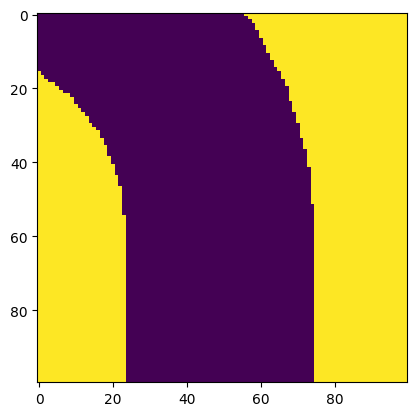

In [211]:
import matplotlib.pyplot as plt
plt.imshow(image_data[24])

In [36]:
# Create data generators for black and white images
image_data = np.array(image_data)
image_datagen = ImageDataGenerator(validation_split=0.2)
image_train_gen = image_datagen.flow(image_data, labels, batch_size=32, subset='training')
image_val_gen = image_datagen.flow(image_data, labels, batch_size=32, subset='validation')


In [46]:
# Build a model to handle both types of data
input_image = Input(shape=(224, 224, 1))
input_features = Input(shape=(features.shape[1]))


In [8]:
# Convert the "Category" column to string type
data['Category'] = data['Category'].astype(str)